### Farklı görüntülerle test işlemleri yapıp sonuçları görselleştirmek

In [10]:
# Kütüphanelerin kurulması
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing import image

**Daha önceki eğitimde kaydettiğimiz modelin hesapladığını, öğrenilmiş ağırlık dosyasını kullanıyoruz.**

In [6]:
# En iyi ağırlıkları yükle

path = '/home/dilaver/Keras_ile_Derin_Ogrenme'
model_best = load_model(path + "/face_model.keras")

In [20]:
# /happy_face.jpg
# /happy_face2.jpg
# /angry_man.jpg

image_path = path+"/happy_face2.jpg"
test_image_original = image.load_img(image_path)

test_image = image.load_img(image_path, target_size=(48,48), color_mode='grayscale')
test_data = image.img_to_array(test_image)

test_data = np.expand_dims(test_data, axis=0)
test_data = np.vstack([test_data])

results = model_best.predict(test_data, batch_size=1)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.11672102, 0.00132681, 0.04958311, 0.43256068, 0.15243636,
        0.00629545, 0.2410765 ]], dtype=float32)

## Sonuçların Görselleştirilmesi

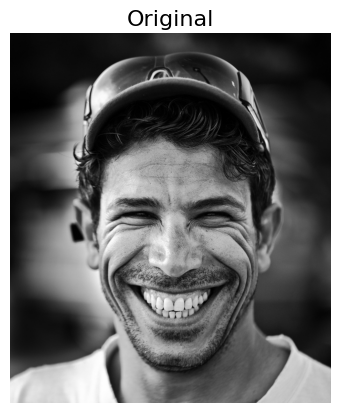

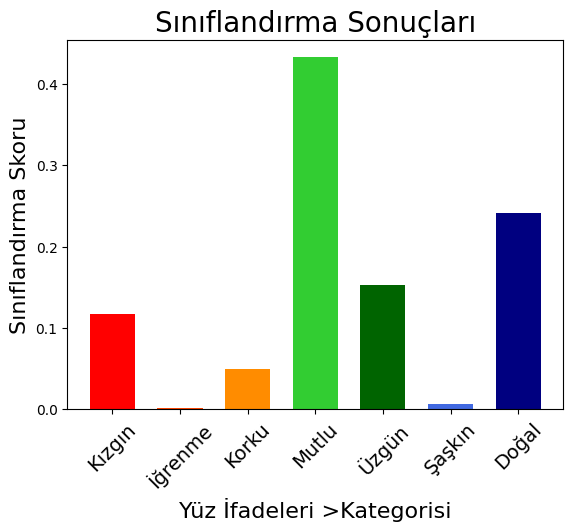

Sınıflandırma Sonucu en yüksek oranla Mutlu


In [21]:
# Sınıflarımız 7 adet duygu durumumuz
class_names = ["Kızgın", "İğrenme", "Korku","Mutlu", "Üzgün", "Şaşkın","Doğal"]

ind = 0.1+0.6*np.arange(len(class_names))
width = 0.4 #bar genişliği

color_list = ["red", "orangered", "darkorange", "limegreen", "darkgreen", "royalblue", "navy"]

#test resmini çizdirelim
plt.imshow(test_image_original)
plt.title("Original", fontsize=16)
plt.axis("off")
plt.show()

#Sonuçları renklendirelim

for i in range(len(class_names)):
    plt.bar(ind[i], results[0][i], width, color=color_list[i])

plt.title("Sınıflandırma Sonuçları", fontsize=20)
plt.xlabel("Yüz İfadeleri >Kategorisi",fontsize=16)
plt.ylabel("Sınıflandırma Skoru",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)
plt.show()

print("Sınıflandırma Sonucu en yüksek oranla", class_names[np.argmax(results)])
